<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_2%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/06%EA%B3%BC_1_%EB%94%A5%EB%9F%AC%EB%8B%9D3_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [4]:
# np.argmax()
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [5]:
np.argmax(a, axis = 0)

array([1, 0, 0])

In [6]:
np.argmax(a, axis = 1)

array([2, 0])

In [7]:
np.argmax(a)

2

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [8]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [9]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [10]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [14]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [15]:
# 메모리 정리
clear_session()

# Sequential # 예측한 값을, 하나의 확률 값으로 변환
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [16]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 146ms/step - loss: 1.1037 - val_loss: 0.9730
Epoch 2/50
3/3 [==============================] - 0s 53ms/step - loss: 0.9580 - val_loss: 0.8074
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.8333 - val_loss: 0.6693
Epoch 4/50
3/3 [==============================] - 0s 82ms/step - loss: 0.7157 - val_loss: 0.5901
Epoch 5/50
3/3 [==============================] - 0s 44ms/step - loss: 0.6491 - val_loss: 0.5296
Epoch 6/50
3/3 [==============================] - 0s 44ms/step - loss: 0.5856 - val_loss: 0.4646
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.5328 - val_loss: 0.4286
Epoch 8/50
3/3 [==============================] - 0s 25ms/step - loss: 0.4990 - val_loss: 0.4010
Epoch 9/50
3/3 [==============================] - 0s 20ms/step - loss: 0.4668 - val_loss: 0.3791
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4408 - val_loss: 0.3598
Epoch 11/50
3/3 [===========

* 학습결과 그래프

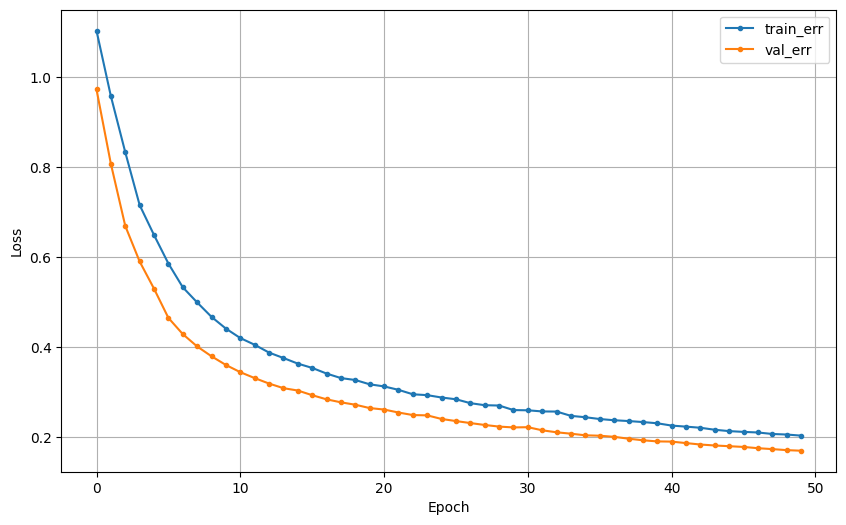

In [17]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [18]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 3ms/step


array([[9.7731495e-01, 2.2585219e-02, 9.9889716e-05],
       [1.1663581e-02, 7.8726929e-01, 2.0106708e-01],
       [1.3979829e-02, 7.1537173e-01, 2.7064845e-01],
       [4.3419775e-04, 3.3963874e-01, 6.5992707e-01],
       [3.5205338e-02, 8.7521440e-01, 8.9580312e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [19]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [20]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)  # 열에서 가장 큰 값의 인덱스를 1로 반환 나머지는 0으로 반환
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [21]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [22]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [23]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [24]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 114ms/step - loss: 1.1506 - val_loss: 1.0925
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 1.0991 - val_loss: 1.0478
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 1.0567 - val_loss: 1.0079
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 1.0193 - val_loss: 0.9714
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.9873 - val_loss: 0.9380
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 0.9536 - val_loss: 0.8990
Epoch 7/50
3/3 [==============================] - 0s 13ms/step - loss: 0.9184 - val_loss: 0.8581
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 0.8833 - val_loss: 0.8158
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.8458 - val_loss: 0.7728
Epoch 10/50
3/3 [==============================] - 0s 13ms/step - loss: 0.8079 - val_loss: 0.7286
Epoch 11/50
3/3 [===========

* 학습결과 그래프

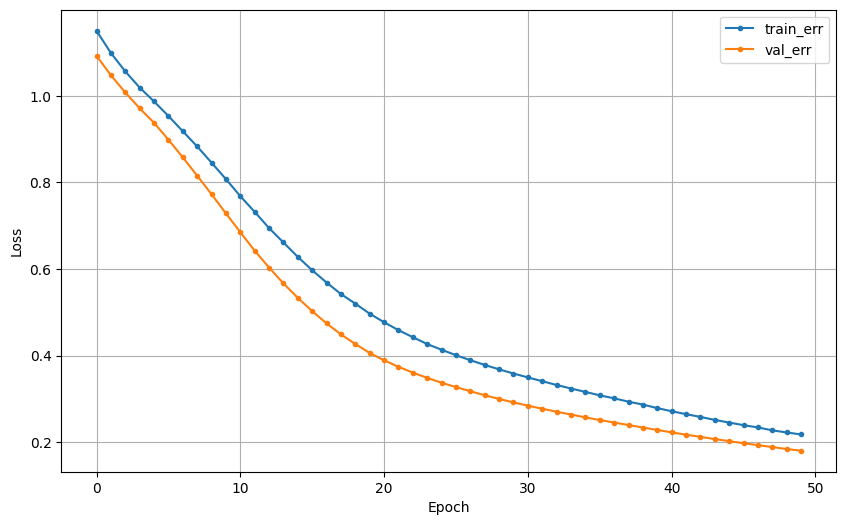

In [25]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [26]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


In [27]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.94      0.89        18
           2       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [28]:
n= x_train.shape[1]
n

4

In [38]:
clear_session()
model2 = Sequential([Dense(8, input_shape=(n, ), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(3, activation='softmax')])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [39]:
model2.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model2.fit(x_train, y_train, epochs=20, validation_split=.2).history

Epoch 1/20
3/3 [==============================] - 2s 249ms/step - loss: 1.3427 - val_loss: 1.2554
Epoch 2/20
3/3 [==============================] - 0s 39ms/step - loss: 1.2085 - val_loss: 1.1483
Epoch 3/20
3/3 [==============================] - 0s 38ms/step - loss: 1.1232 - val_loss: 1.0754
Epoch 4/20
3/3 [==============================] - 0s 44ms/step - loss: 1.0735 - val_loss: 1.0168
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 1.0321 - val_loss: 0.9681
Epoch 6/20
3/3 [==============================] - 0s 50ms/step - loss: 0.9956 - val_loss: 0.9246
Epoch 7/20
3/3 [==============================] - 0s 42ms/step - loss: 0.9573 - val_loss: 0.8772
Epoch 8/20
3/3 [==============================] - 0s 49ms/step - loss: 0.9136 - val_loss: 0.8241
Epoch 9/20
3/3 [==============================] - 0s 65ms/step - loss: 0.8691 - val_loss: 0.7694
Epoch 10/20
3/3 [==============================] - 0s 36ms/step - loss: 0.8195 - val_loss: 0.7142
Epoch 11/20
3/3 [===========

* 학습결과 그래프

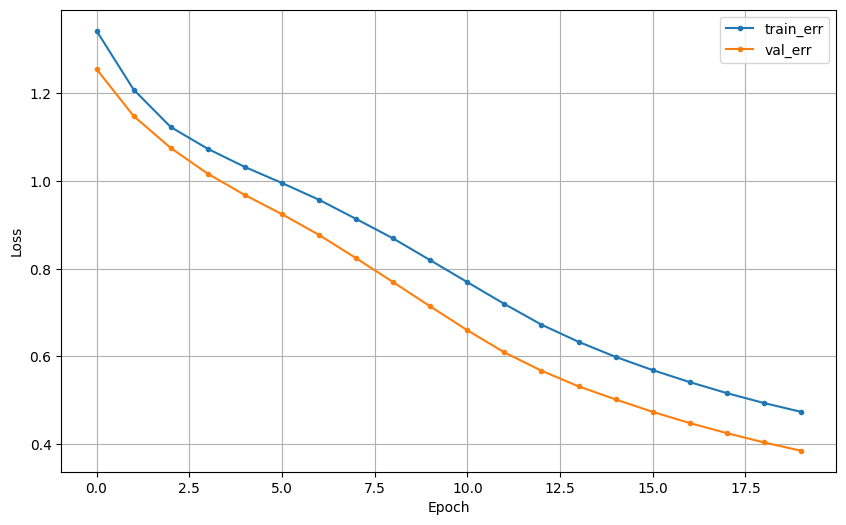

In [40]:
dl_history_plot(hist)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [42]:
pred = model2.predict(x_val)
pred = np.argmax(pred, axis=1)

2/2 [==============================] - 0s 4ms/step


In [43]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[13  0  0]
 [ 0  0 18]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        18
           2       0.44      1.00      0.61        14

    accuracy                           0.60        45
   macro avg       0.48      0.67      0.54        45
weighted avg       0.42      0.60      0.48        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

In [44]:
n

4

In [77]:
clear_session()
model3 = Sequential([Dense(16, input_shape=(n,), activation='relu'),
                     Dense(9, activation='relu'),
                     Dense(3, activation='softmax'),])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 9)                 153       
                                                                 
 dense_2 (Dense)             (None, 3)                 30        
                                                                 
Total params: 263 (1.03 KB)
Trainable params: 263 (1.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [78]:
model3.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model3.fit(x_train, y_train, epochs=35, validation_split=.2).history # verbose = 0

Epoch 1/35
3/3 [==============================] - 2s 280ms/step - loss: 1.0226 - val_loss: 0.9193
Epoch 2/35
3/3 [==============================] - 0s 13ms/step - loss: 0.9346 - val_loss: 0.8306
Epoch 3/35
3/3 [==============================] - 0s 13ms/step - loss: 0.8582 - val_loss: 0.7540
Epoch 4/35
3/3 [==============================] - 0s 12ms/step - loss: 0.7916 - val_loss: 0.6865
Epoch 5/35
3/3 [==============================] - 0s 15ms/step - loss: 0.7308 - val_loss: 0.6270
Epoch 6/35
3/3 [==============================] - 0s 13ms/step - loss: 0.6754 - val_loss: 0.5775
Epoch 7/35
3/3 [==============================] - 0s 16ms/step - loss: 0.6318 - val_loss: 0.5365
Epoch 8/35
3/3 [==============================] - 0s 15ms/step - loss: 0.5926 - val_loss: 0.4993
Epoch 9/35
3/3 [==============================] - 0s 19ms/step - loss: 0.5588 - val_loss: 0.4626
Epoch 10/35
3/3 [==============================] - 0s 14ms/step - loss: 0.5240 - val_loss: 0.4323
Epoch 11/35
3/3 [===========

* 학습결과 그래프

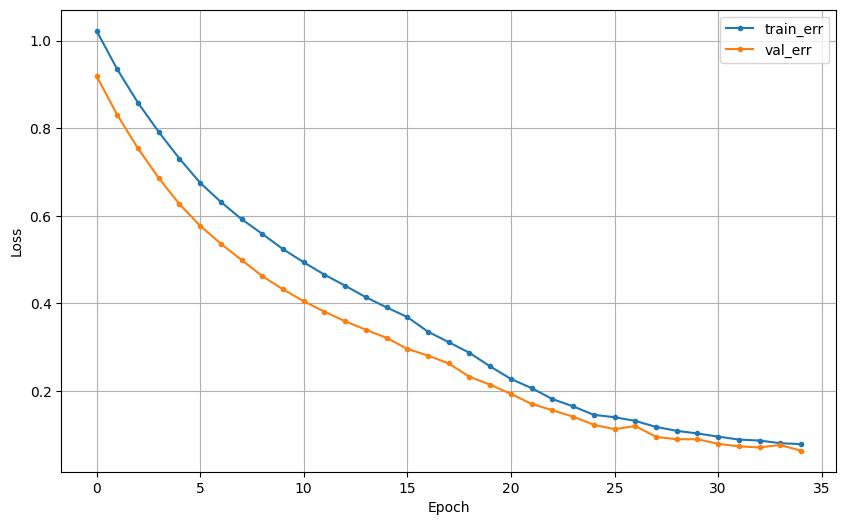

In [79]:
dl_history_plot(hist)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [80]:
pred = model3.predict(x_val)
pred = np.argmax(pred, axis=1)

2/2 [==============================] - 0s 5ms/step


In [81]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.94      0.89        18
           2       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [82]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [87]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [85]:
y_c = to_categorical(y.values, 3) # 클래스 3개 원-핫-인코딩

In [86]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [88]:
y_c[-5:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .2, random_state = 2024)

In [90]:
y_train.shape

(120, 3)

### (3) Scaling

In [91]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [92]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [93]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [94]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 1s 94ms/step - loss: 1.0344 - val_loss: 0.9226
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8830 - val_loss: 0.8314
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7601 - val_loss: 0.7359
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6683 - val_loss: 0.6816
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6155 - val_loss: 0.6292
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.5593 - val_loss: 0.5794
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.5169 - val_loss: 0.5460
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4887 - val_loss: 0.5188
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4662 - val_loss: 0.4948
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4486 - val_loss: 0.4819
Epoch 11/100
3/3 [=

* 학습결과 그래프

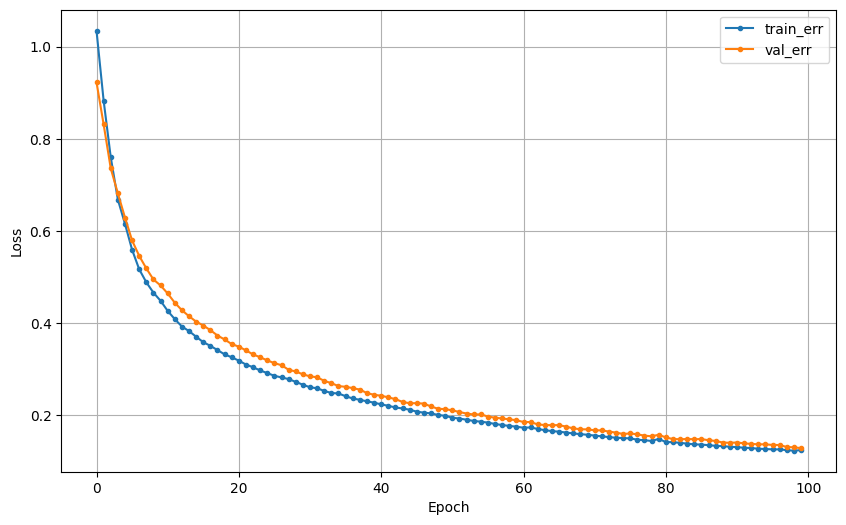

In [95]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [96]:
pred = model.predict(x_val)
pred[:5]

1/1 [==============================] - 0s 49ms/step


array([[9.9677032e-01, 3.2295987e-03, 7.3899380e-09],
       [9.9682307e-01, 3.1769781e-03, 9.6102788e-09],
       [4.1914028e-03, 7.6582640e-01, 2.2998214e-01],
       [1.3650069e-03, 4.4500309e-01, 5.5363190e-01],
       [9.9673170e-01, 3.2682274e-03, 1.4031255e-08]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [97]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 0, 1, 2, 0])

In [98]:
y_val

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [99]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 0])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [100]:
y_val[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [101]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 2, 0])

In [102]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[12  0  0]
 [ 0  6  2]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.89      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30

